Travail sur les données du Covid-19 se trouvant sur le site de Kaggle **Diagnosis of COVID-19 and its clinical spectrum**.
Ce dataset regroupe les résultats cliniques de plus de 5000 personnes en indiquant à chaque fois si la personne souffre de la maladie du covid-19 ou non.

# Démarche de travail en Data Science

1. **Définir un objectif mesurable**:

- **Objectif** : Prédire si une personne est infectée ou non en fonction des données cliniques disponibles.
- **Métrique** : *Accuracy* -> 90% (avec 90% d'exactitude), -->> les bonnes mésures de performances vont être : **la précision**, le **Recall (sensibilité)** et le **score F1** (qui fait le rapport entre la précision et le recall).

La **Précision** = TP/(TP + FP) -> permet de réduire au maximum le taux(nombre) de **Faux Positifs**. Ainsi on évitera d'envoyer les gens n'ayant pas le covid d'aller à l'hôpital.

Le **Recall** = TP/(TP + FN) -> permet de réduire au maximum le taux(nombre) de **Faux Négatifs**. Ainsi on évitera de laisser les gens ayant le covid se balader dans la nature.

La précision, le recall et le score F1 sont des mesures de performance qui sont calculées à partir des éléments qu'on trouve dans une matrice de confusion donc les faux positifs et les faux négatifs

Pour notre métrique, on se fixe un score F1 de -> 50% et un Recall de -> 70%

2. **EDA (Exploratory Data analysis/Analyse et exploration des données)**

Ici l'objectif est de se mettre à l'aise avec le dataset, de comprendre au maximum les différentes variables pour ensuite définir une stratégie de modélisation.

3. **Pre-processing**

Ici l'objectif est de transformer le dataset dans un format qui va être propice au développement des modèles de Machine Learning.

4. **Modelling**

Ici l'objectif est de créer un modèle de Machine Learning, de l'entraîner, de l'évaluer et de tenter de l'améliorer en sélectionnant par exemple d'autres variables, etc.

# Chargement du dataset

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
pd.set_option('display.max_row', 111) #permet d'afficher les résultats en entier, à insérer avant d'importer la base des données
#cet argument nous permet d'afficher les types de tous les données contenues dans le dataset lorsqu'on fera appel à "dtypes" plus bas

pd.set_option('display.max_column', 111)

In [118]:
data = pd.read_excel('dataset.xlsx')
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

## 1. Exploratory Data Analysis

**Objectif : Comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation**

**Checklist de base(non-exhaustive)**

### Analyse de la forme:
- Identification de la target ou la variable à expliquer : **SARS-Cov-2 exam result**
- Nombre de lignes et de colonnes : **5644, 111**
- Types de variables : **70 variables qualitatives, 41 variables quantitatives**
- Identification des valeurs manquantes : **on a beaucoup de NaN (moitié des variables > 90% de NaN), il y a 2 groupes de données dans notre dataset. Les variables qui ont 76% de valeurs manquantes sont des variables en lien avec le test viral ; et les variables qui ont 89% de valeurs manquantes sont les variables en lien avec les taux sanguins.**


### Analyse du fond:
- Visualisation de la target(Histogramme/Boxplot) : **10% de cas positifs (558/5000)**

- **Compréhension des différentes variables(Internet) ou Signification des variables :** 
     - variables continues standardisées, skewed (asymétriques), test sanguin
     - age quantile : difficile d'interpréter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi être une transformation mathématiques. On peut pas savoir car la personne qui a mis ce datset ne le précise nul part. Mais ça, ce n'est pas très important.
     - variable qualitative : binaire (0, 1), ce sont des variables virales, et la variable Rhinovirus semble très élevée
        
- **Visualisation des relations features-target(Histogramme/Boxplot) :**
     - target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothèse à tester
     - target / age : les individus de faible âge sont très peu contaminés? -> Attention!!!on ne connaît pas l'âge, et on sait pas de quand date le dataset(s'il s'agit des enfants, on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra être intéressante pour la comparer avec les résultats de tests sanguins 
     - target / viral : les doubles maladies sont très rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> Hypothèse à tester? mais il est possible que la région est subie une épidemie de ce virus. De plus, on peut très bien avoir 2 virus en même temps. Tout ça n'a aucun lien avec le covid-19

- Identification des outliers

### analyse plus détaillée :

- Relation Variables / Variables :
    - blood_data / blood_data : certaines variables sont très corrélées : +0.9 de coefficient de corrélation (à surveiller plus tard)
    - blood_data / age : très faible corrélation entre âge et taux sanguins
    - viral / viral : influenza rapid test donne de mauvais résultats, il faudra peut-être la laisser tomber
    - relation maladie / blood_data : Les taux sanguins entre malades et covid-19 sont différents
    - relation hospitalisation / est malade :
    - relation hospitalisation / blood : intéressant dans le cas où on voudrait prédire dans quelle service un patient devrait aller
  
- **NaN analyse** : viral : 1350(92/8), blood : 600(87/13), both : 90

#### Hypothèses nulles (H0) :

- Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
    - H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs (**On va mettre en place un test de student qui permet de vérifier si la moyenne entre deux distributions est différente / significativement différente**. *Le principe du test de student sera de rejeter l'hypothèse H0 qui dit que les taux moyens sont égaux*. Pour rejetter H0, on définit un seuil **alpha** en général aux alentours de *2%* ou *5%*, on calcule ensuite une valeur *p* avec notre test de student ou de chi2; et si la valeur *p* est inférieure à **alpha**, alors on rejette H0, et si *p* est > à **alpha**, on ne rejette pas H0.)
    
    Après étude, on rejette l'hypothèse H0, et on conclut que les taux moyens ne sont pas égaux chez les individus positifs et négatifs.
    
- Les individus atteints d'unr quelconque maladie ont des taux significativement différents

## Conclusions initiales avant l'analyse plus détaillée :

- Beaucou de données manquantes (au mieux on garde 20ù du dataset)
- 2 groupes de données intéressantes (viral, sanguin)
- Presque pas de variable "discriminantes" pour distinguer les cas positifs/négatifs, ce qui nous permet de dire qu'il n'est pas vraiment approprié de vouloir prédire si un individu est atteint du covid-19 en se basant sur ces simples tests sanguins. Mais ce n'est pas grave, il faut quand-même poursuivre l'analyse pour essayer de voir ce qu'on peut apprendre. Rome ne s'est pas faite en un jour, et le Machine Learning ça peut pas tranformer l'eau en vin. Mais ça n'est pas une raison pour abandonner le projet. Et ça, c'est la chose la plus importante que vous devez retenir de cette vidéo : Un bon data scientist, il va jusqu'au bout de sa mission. Si en cours de route, on se rend compte que 'histoire n'est pas aussi simple qu'on pouvait l'espérer, alors il faut pouvoir le démontrer de façon robuste en allant jusqu'au bout des choses.
- Donc mainteant quand-même quelque chose de positif : on a pu identifier les variables intéressantes qui sont susceptibles de jouer un rôle non négligeable (monocytes, etc.)

**Analyse de la forme**:

In [119]:
df = data.copy()

In [120]:
df.shape 

(5644, 111)

In [121]:
df.dtypes #Nous permet de connaître les types des variables (qualitatives ou quantitatives) que l'on retrouve dans 
#notre dataset

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [122]:
df.dtypes.value_counts() #Values_counts() nous permet de compter le nombre des types de variables que nous avons dans notre dataset

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:ylabel='None'>

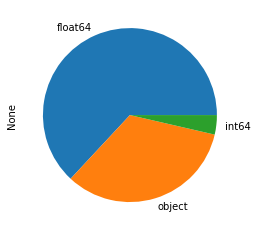

In [123]:
df.dtypes.value_counts().plot.pie()

In [124]:
df.isna() #on vérifie la présence de données manquantes dans notre dataset

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

<AxesSubplot:>

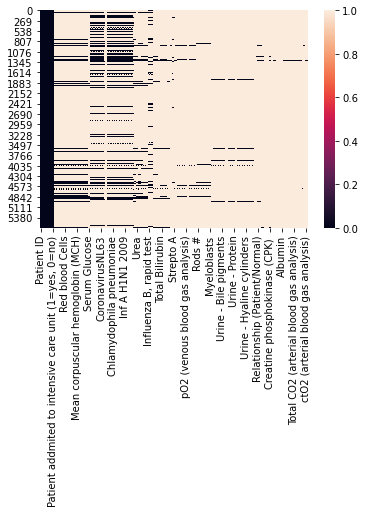

In [125]:
sns.heatmap(df.isna()) #En blanc, c'est là où se trouve nos valeurs manquantes, en noir là où il y a des valeurs

<AxesSubplot:>

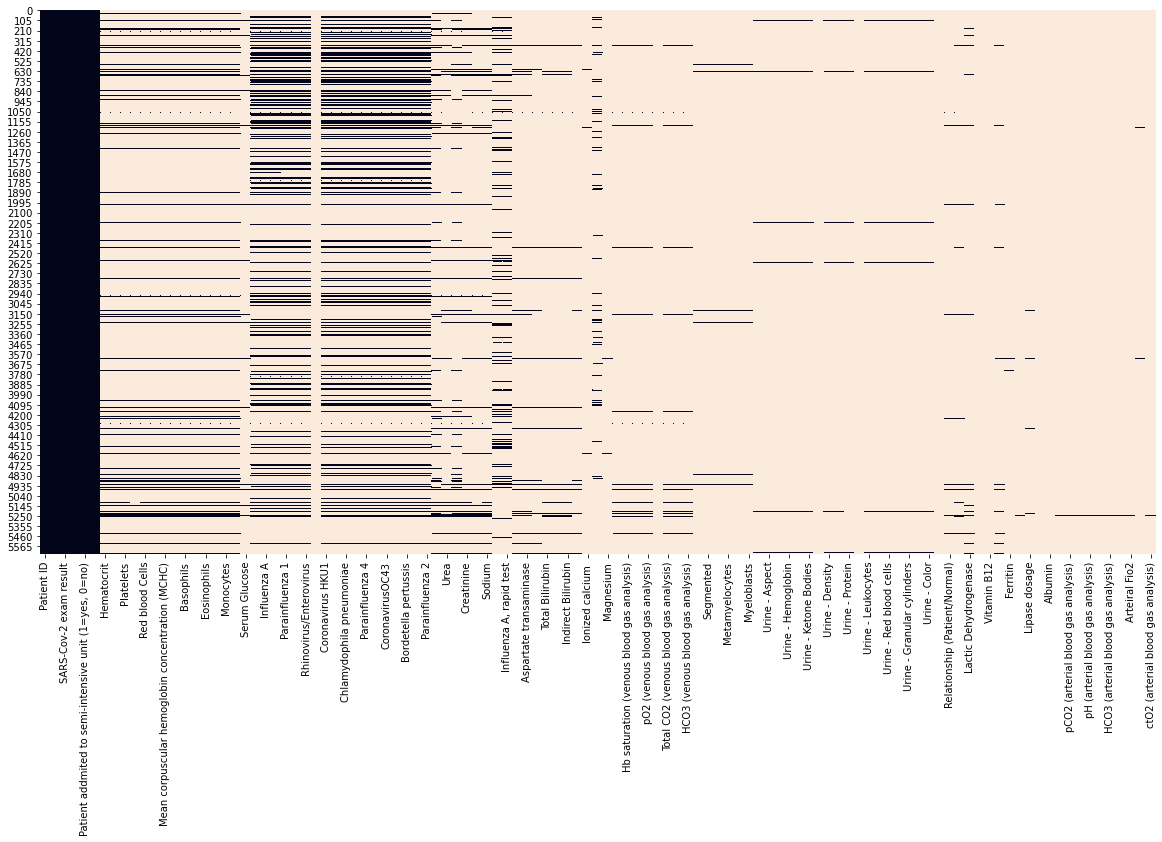

In [126]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.isna(), cbar = False) #En analysant ce graphique, on voit qu'il y a plusieurs données manquantes dans notre 
#dataset, toutes les colonnes sur la droite sont vides. Pour les colonnes de gauches, on pourra faire une élimination de valeurs
#manquantes avec "dropna" peut-être, les variables qui forment une ligne ont sans doute un rapport les unes avec les autres

In [127]:
#Pour mesurer le pourcentage des valeurs manquantes qui nous manque dans nos différentes colonnes:
df.isna().sum()/df.shape[0] #on divise la somme par le nombre des lignes de notre tableau

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [128]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = True) #Pour classer nos pourcentages par ordre croissant

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

### Analyse du fond

### 1. Visualisation initiale - Élimination des colonnes inutiles

Avant d'entamer cette analyse du fond, nous allons un petit peu nettoyer notre dataset. On va commcencer par éliminer les colonnes inutiles.

In [129]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]] #Ceci correspond à notre nouveau dataset
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

<AxesSubplot:>

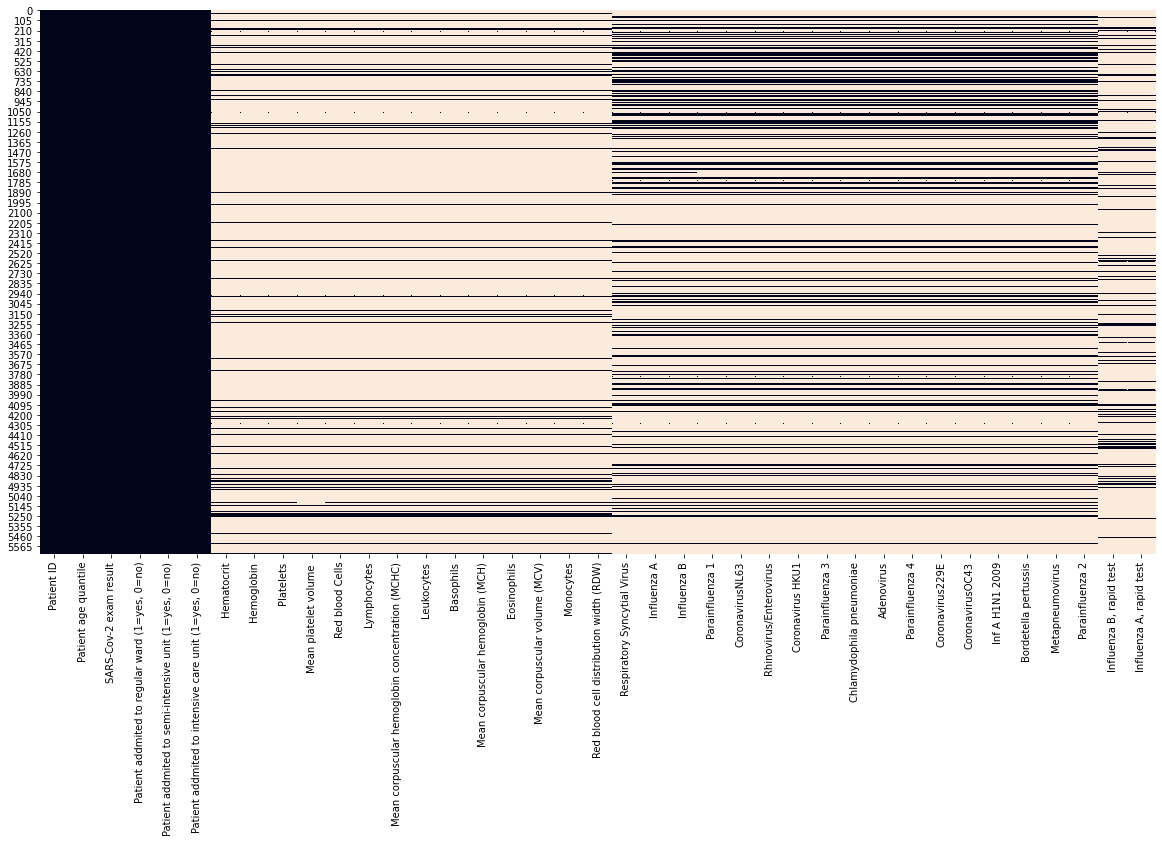

In [130]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.isna(), cbar = False) #On a bien éliminé nos colonnes inutiles mais nous allons également éliminer la colonne
#patient ID

In [131]:
df = df.drop('Patient ID', axis = 1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

### Examen de la colonne target

In [132]:
df['SARS-Cov-2 exam result'].value_counts(normalize = True) #normalize = true : nous permet d'affficher le poucentage

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Histogrames des variables continues

In [133]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

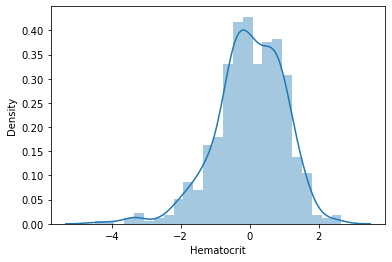

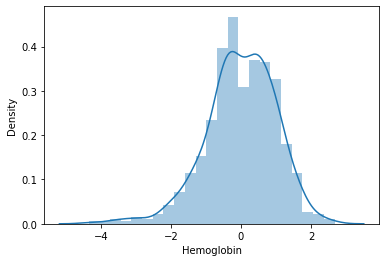

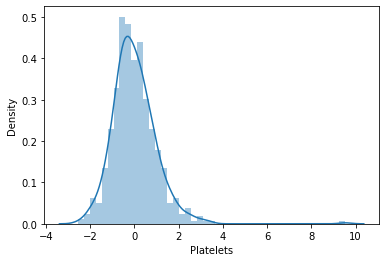

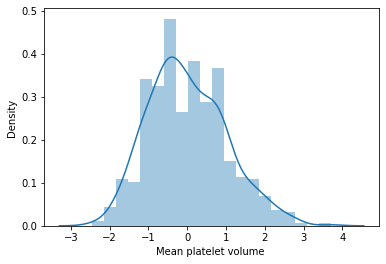

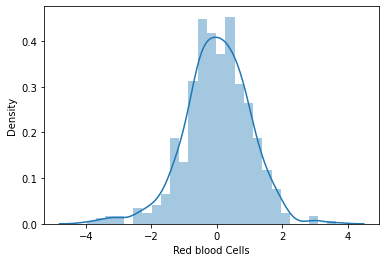

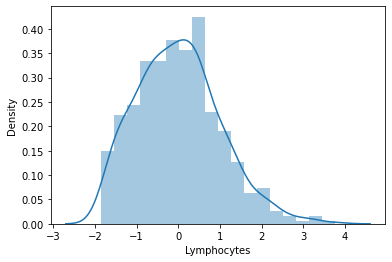

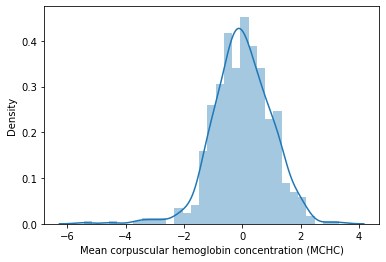

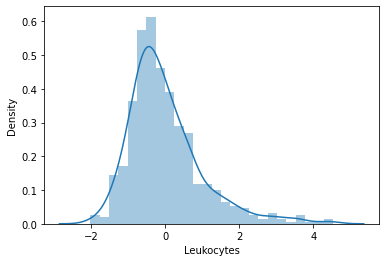

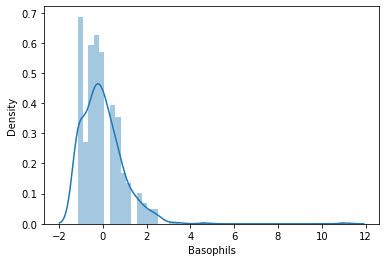

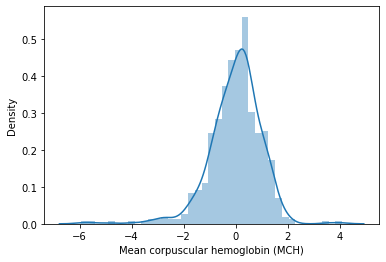

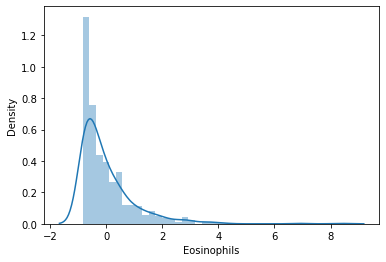

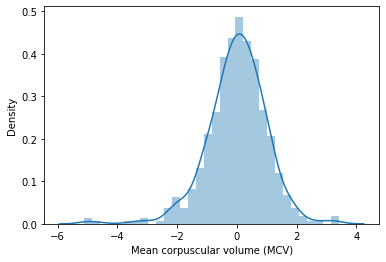

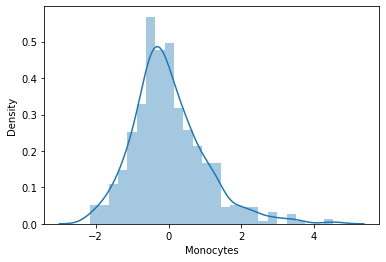

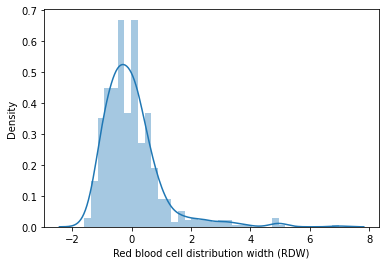

In [134]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col]) #Nous remarquons que toutes nos courbes sont centrées en 0 et elles ont l'air d'avoir un écart-type
    #égale à 1. Ce qui nous laisse immédiatement comprendre que ces données ont été standardisées. Pas mal de ces variables
    #suivent une distribution noramle, mais pas toutes. D'autres ont une distribrution asymétrique

<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

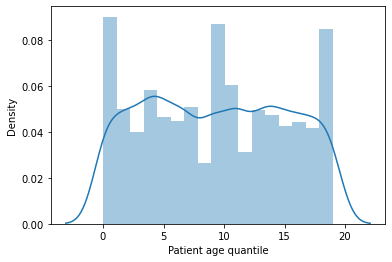

In [135]:
sns.distplot(df['Patient age quantile'])

In [136]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

### Variables Qualitatives

In [137]:
df['SARS-Cov-2 exam result'].unique() #On obtient un tableau qui nous donne les 2 catégories présentes dans notre target

array(['negative', 'positive'], dtype=object)

In [138]:
for col in df.select_dtypes('object'):
    print(col, df[col].unique())

#Le résultat suivant est relativement illisible, on apporte des modifications dans notre code!!

SARS-Cov-2 exam result ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A [nan 'not_detected' 'detected']
Influenza B [nan 'not_detected' 'detected']
Parainfluenza 1 [nan 'not_detected' 'detected']
CoronavirusNL63 [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Coronavirus HKU1 [nan 'not_detected' 'detected']
Parainfluenza 3 [nan 'not_detected' 'detected']
Chlamydophila pneumoniae [nan 'not_detected' 'detected']
Adenovirus [nan 'not_detected' 'detected']
Parainfluenza 4 [nan 'not_detected' 'detected']
Coronavirus229E [nan 'not_detected' 'detected']
CoronavirusOC43 [nan 'not_detected' 'detected']
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Bordetella pertussis [nan 'not_detected' 'detected']
Metapneumovirus [nan 'not_detected' 'detected']
Parainfluenza 2 [nan 'not_detected']
Influenza B, rapid test [nan 'negative' 'positive']
Influenza A, rapid test [nan 'negative' 'positive']


In [139]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}') #On voit que toutes nos variables sont binaires sauf la variable "Parainfluenza 2"

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

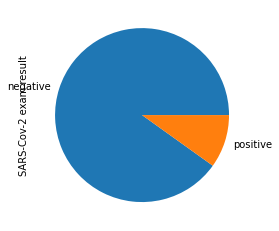

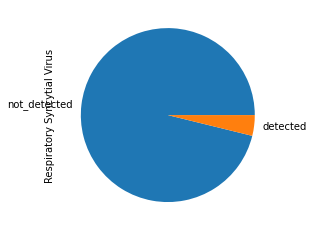

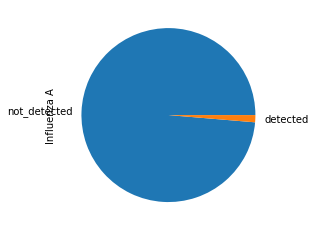

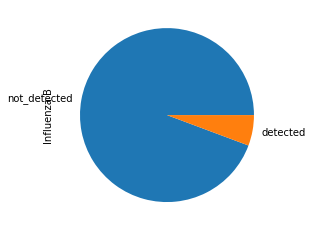

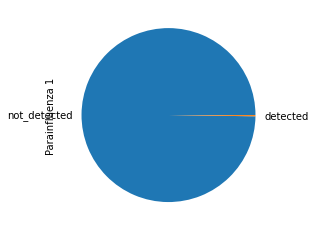

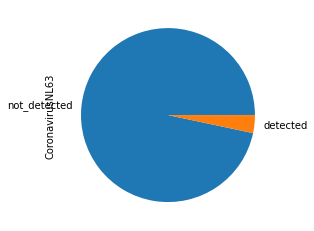

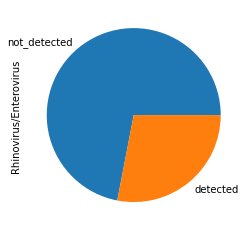

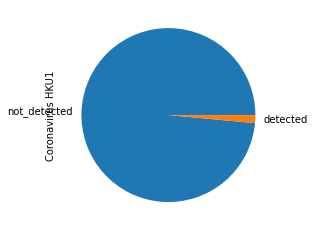

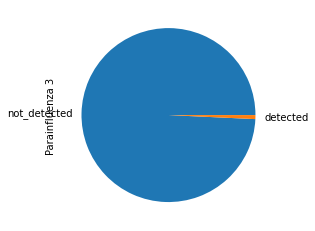

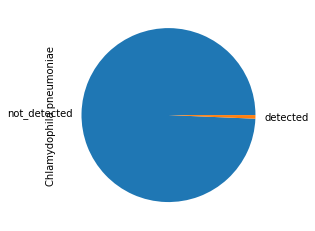

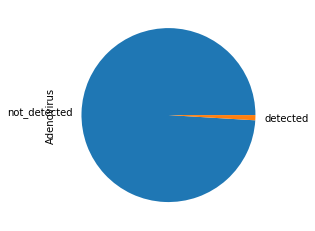

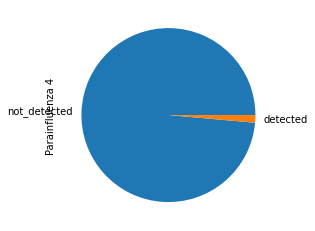

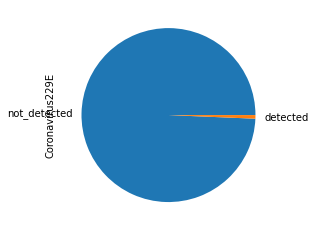

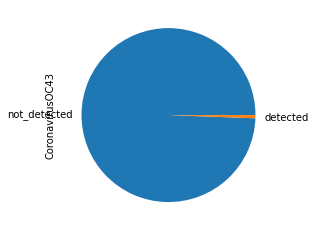

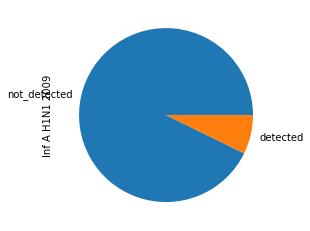

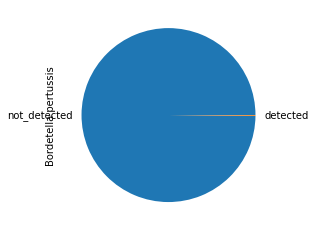

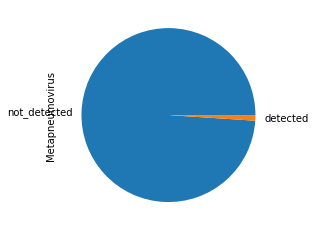

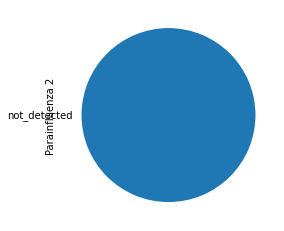

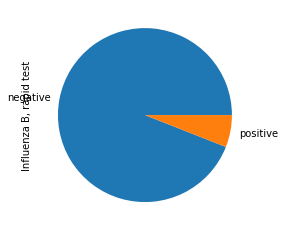

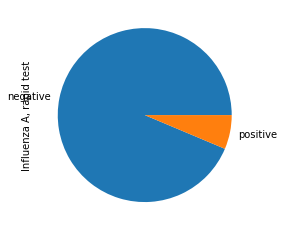

In [140]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie() #On peut voir que la majorité des tests viraux sont négatifs!!!!

## Rélation Target/Variables

### Création de sous-ensembles positifs et négatifs

Étant donné qu'ici nous avons deux groupes d'individus càd les individus positifs et les individus négatifs, on va commencer par créer des sous-ensembles avec d'une part nos individus positifs et d'autre part nos individus négatifs pour faciliter l'analyse après.

In [141]:
#On va faire du booléen indexing

positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [142]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Création des ensembles Blood et viral

In [143]:
missing_rate = df.isna().sum()/df.shape[0]

#on utilise le taux de valeurs manquantes

In [144]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [145]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

### Visualisation de la relation Target / Blood

On va faire une visualisation en séparant les cas qui sont positifs de ceux qui sont négatifs

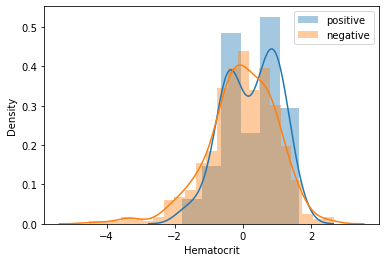

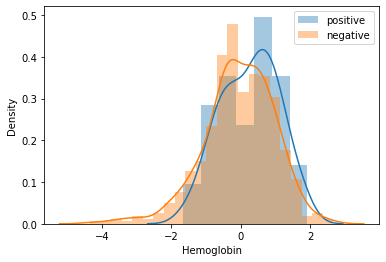

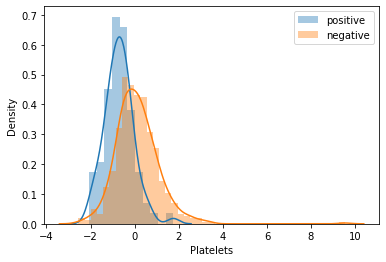

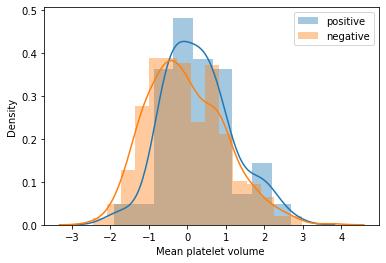

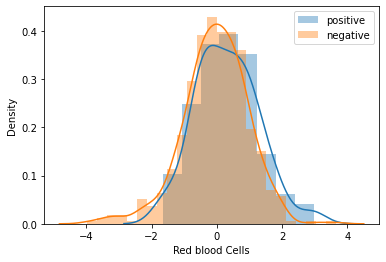

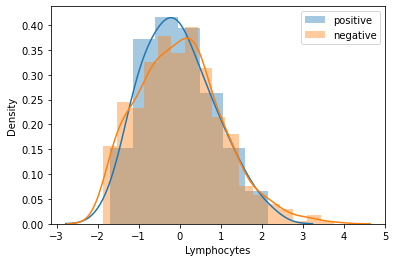

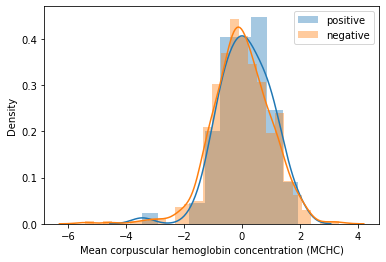

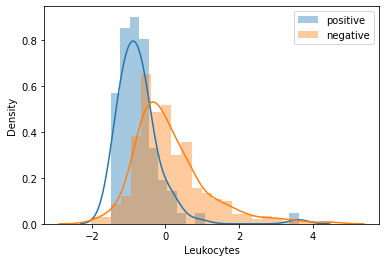

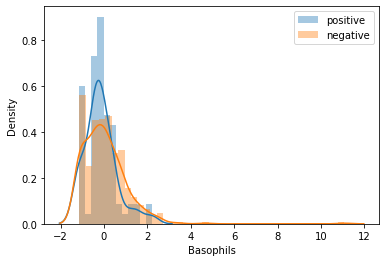

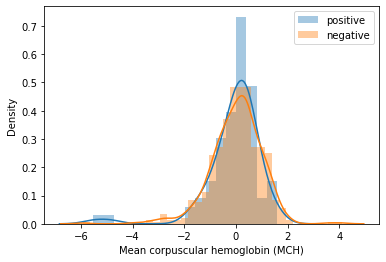

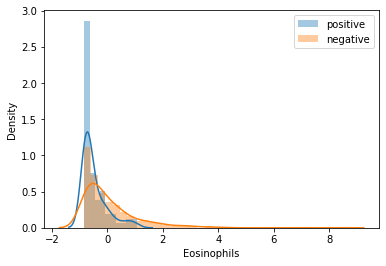

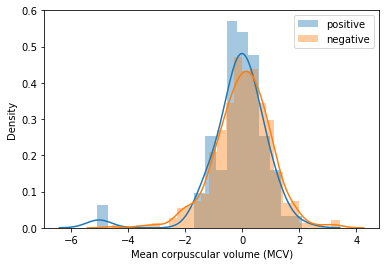

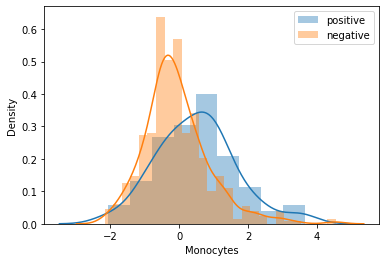

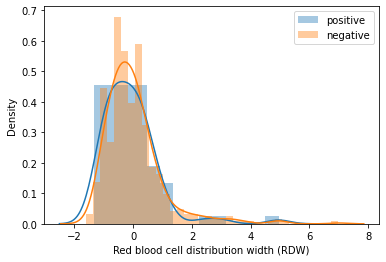

In [146]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label = 'positive')
    sns.distplot(negative_df[col], label = 'negative')
    plt.legend()

### Visualisation de la relation Target / âge

Une fonction très importante de seaborn **countplot** 

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

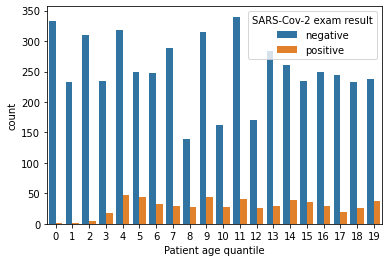

In [147]:
sns.countplot(x = 'Patient age quantile', hue = 'SARS-Cov-2 exam result', data = df)

#Dans ce graphique, on compte le nombre d'apparution de chaque patient-age quantile pour le resultat positif et le resultat 
#négatif de la variable SARS-Cov-2.
#Selon ce graphique, il semblerait que l'âge soit lié au fait que l'on est positif ou négatif au corona virus.

### Visualisation de la relation Target / Viral

**Crosstab**: outil très important pour un data scientist qui veut visualiser la relation existant entre deux variables qualitatives ou catégorielles!!!

In [148]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

#Nous voyons que 18 personnes détectées contaminées au ""Influenza A sont négatifs au covid-19( dans l'hôpital où l'étude
# a été faite)
#Nous voyons que 112 personnes non détectées contaminées au "Influenza A" sont positifs au covid-19.

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

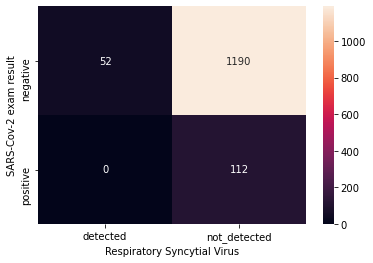

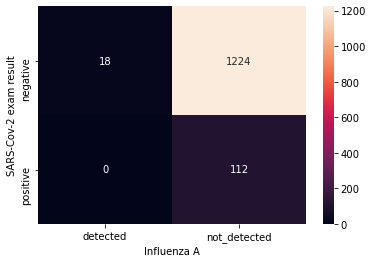

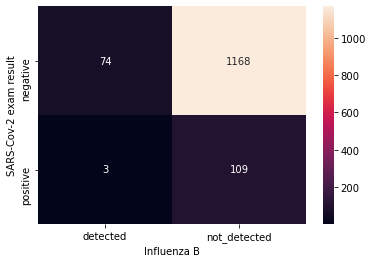

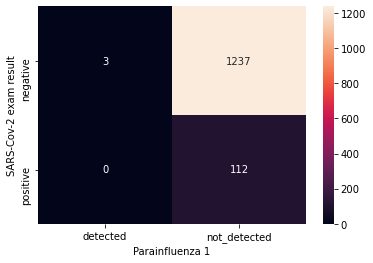

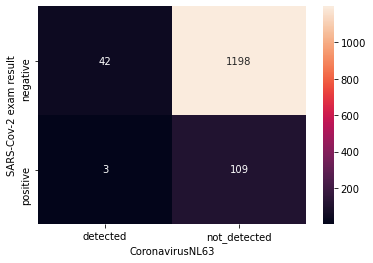

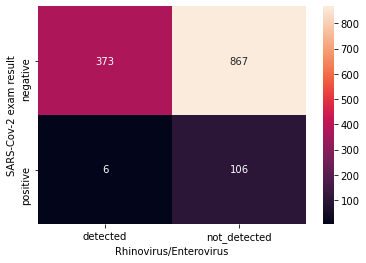

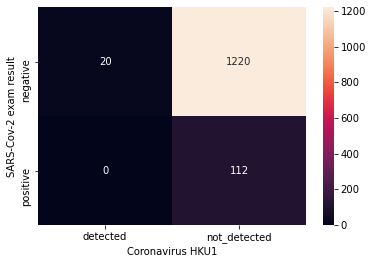

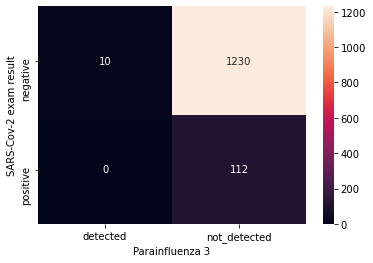

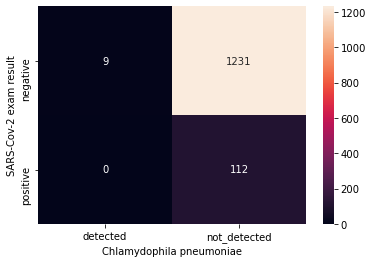

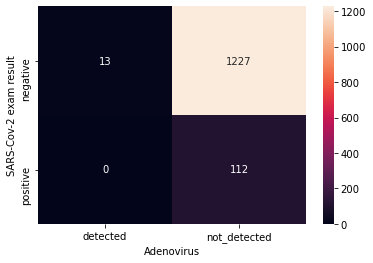

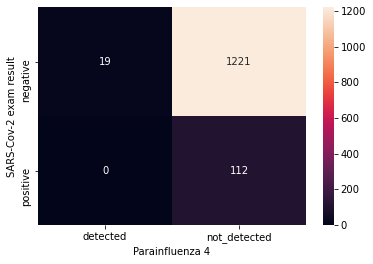

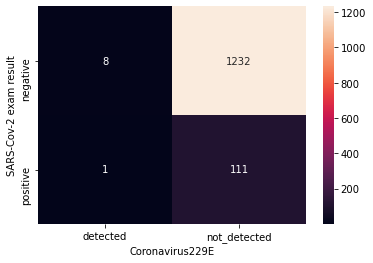

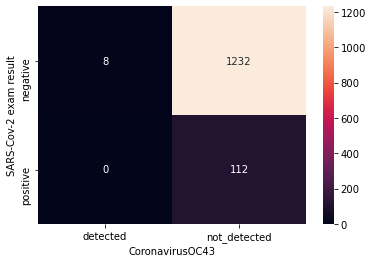

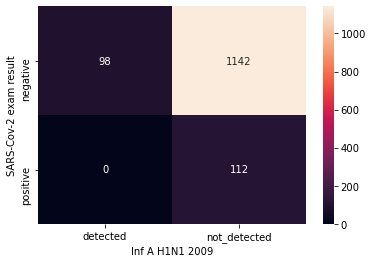

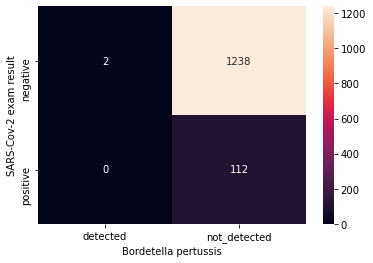

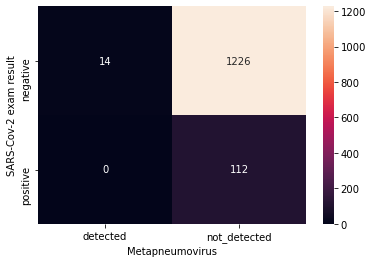

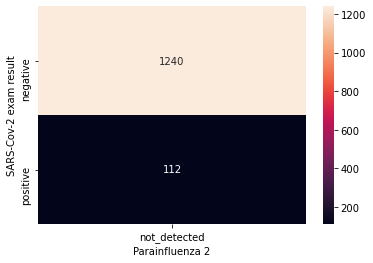

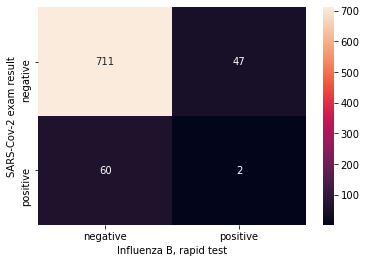

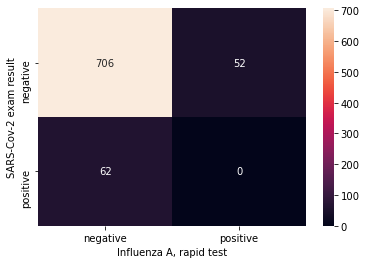

In [149]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot = True, fmt = 'd')

#Cette boucle "for" permet de piocher l'une après l'autre les différentes variables que l'on a dans viral_columns
#l'argument "annot" permet de d'afficher le nombre dans notre heatmap,l'argument fmt='d' permet de spécifier que les chiffres 
#affichés dans le graphique sont des entiers.

#En général, on voit sur ces heatmaps qu'il est rare que les personnes soient contaminées avec les 2 virus en même temps. Mais
#cela n'est pas le cas biologiquement!!!

## Analyse un peu plus Avancée

## Relation variables / variables

### Relations "Taux Sanguin"

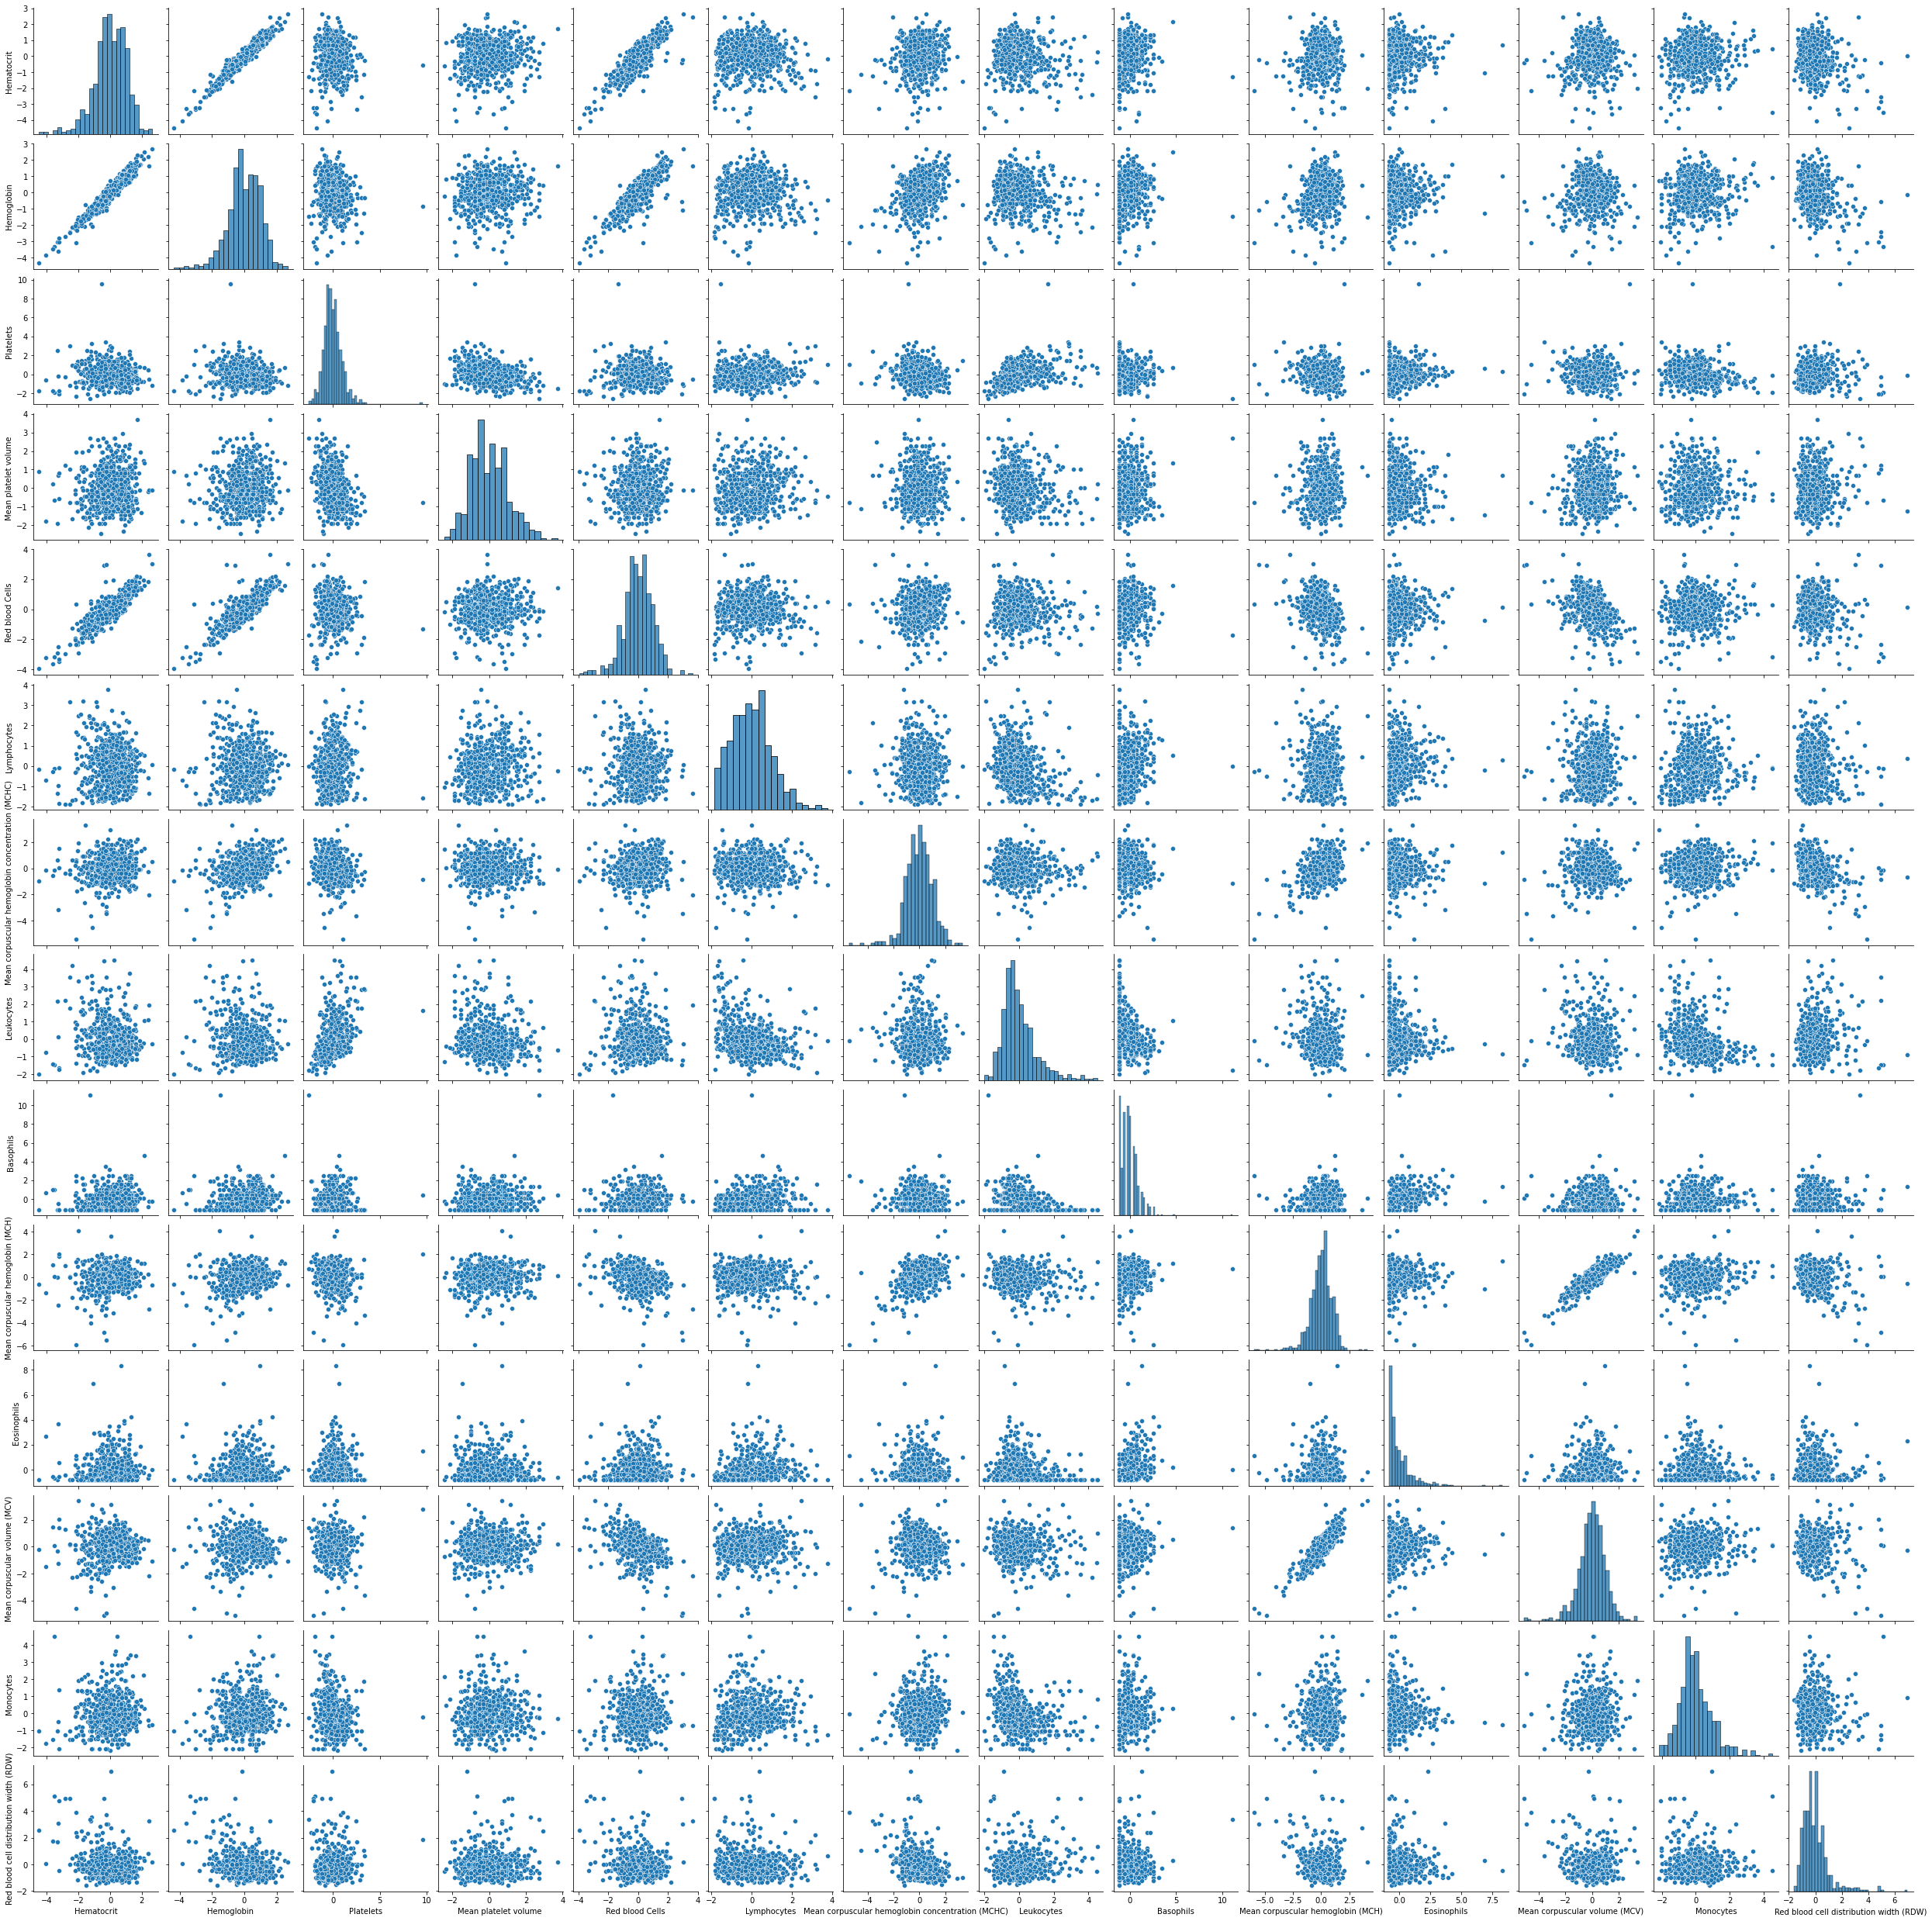

In [150]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

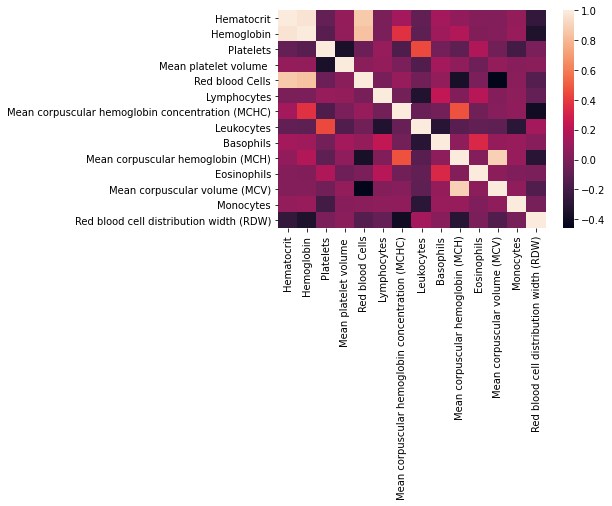

In [151]:
sns.heatmap(df[blood_columns].corr()) 

#On trace une matrice de corrélation

#Plus une corrélation est proche de 1, plus les deux variables évoluent positivement les unes avec les autres; donc quand l'une 
#augmente, l'autre augmente aussi!!! Par exemple, l'hematocrit et l'hemoglobin sont fortement corrélés

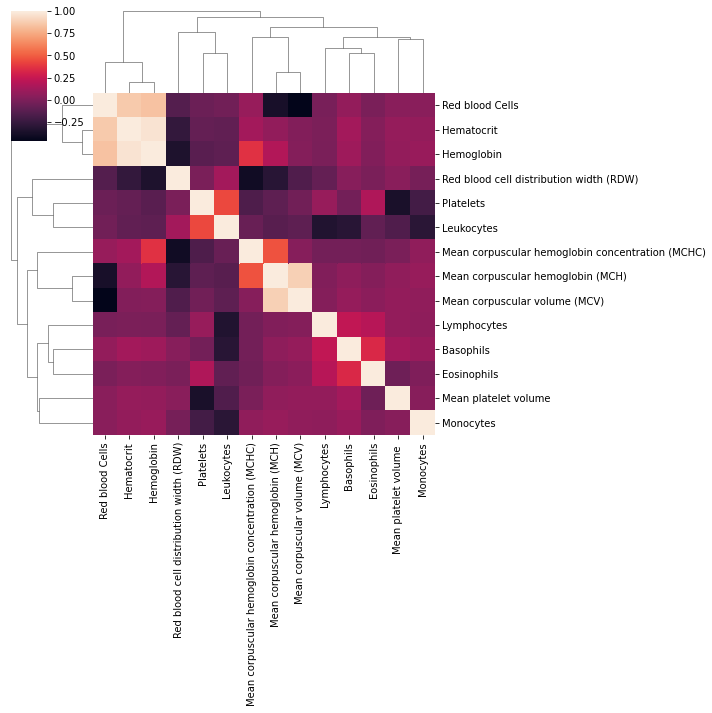

In [152]:
sns.clustermap(df[blood_columns].corr())  

#Clustermap : est une autre fonction de seaborn, elle organise ou rassemble nos variables de façon à créer un cluster
#On peut voir que Red blood Cells, Hematocrit et Hemoblobin sont très corrélés!!!

## Relation Age / Sanguin

la fonction "lmplot" permet de visualiser les courbes de régression dans nos nuages de points!!!

<Figure size 432x288 with 0 Axes>

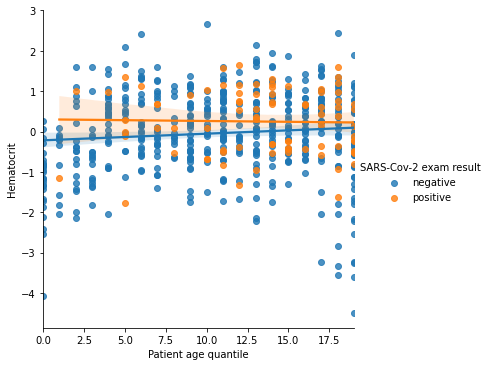

<Figure size 432x288 with 0 Axes>

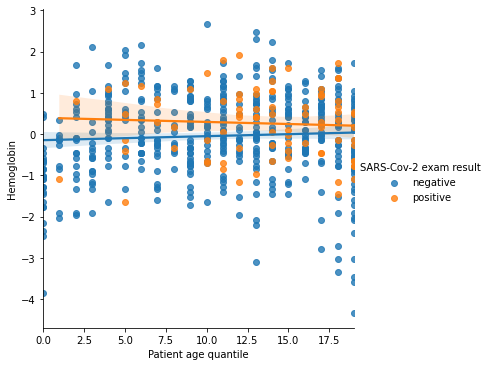

<Figure size 432x288 with 0 Axes>

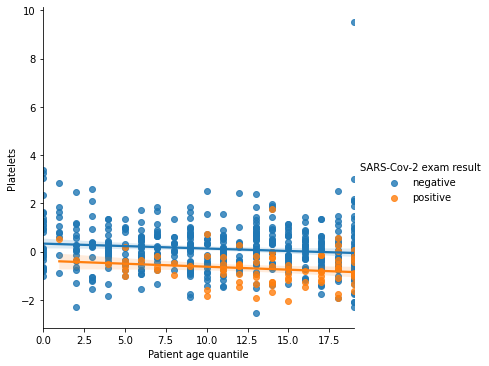

<Figure size 432x288 with 0 Axes>

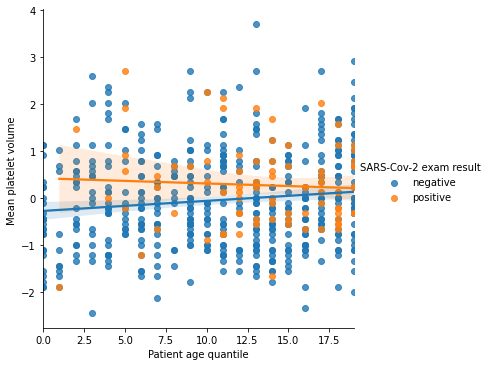

<Figure size 432x288 with 0 Axes>

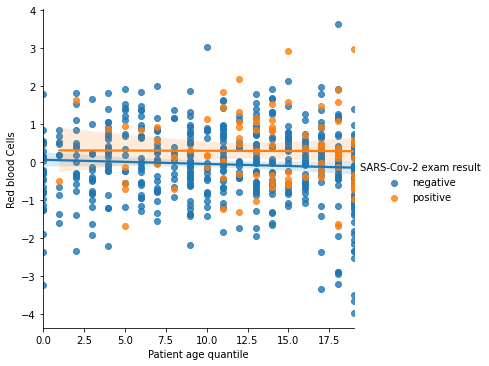

<Figure size 432x288 with 0 Axes>

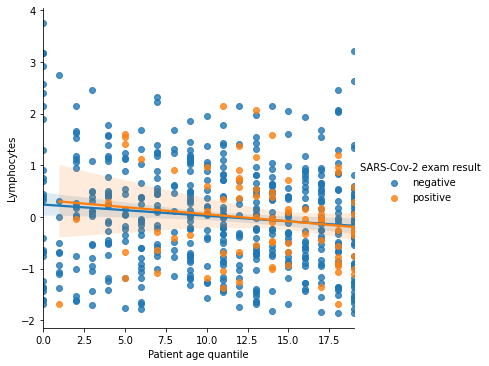

<Figure size 432x288 with 0 Axes>

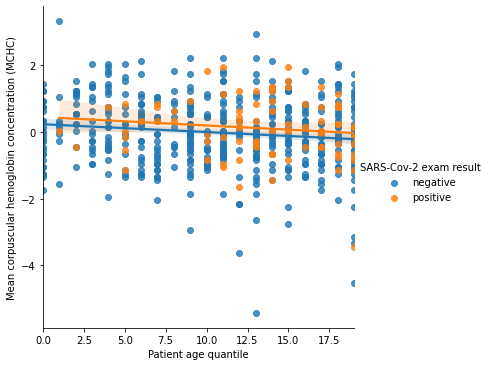

<Figure size 432x288 with 0 Axes>

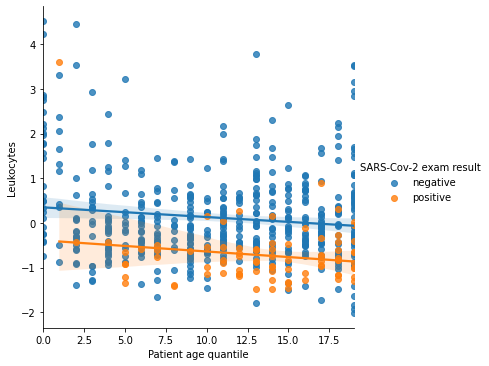

<Figure size 432x288 with 0 Axes>

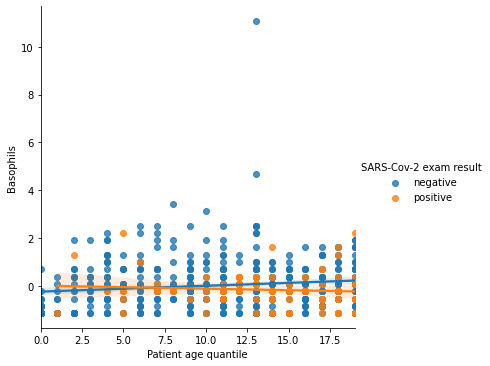

<Figure size 432x288 with 0 Axes>

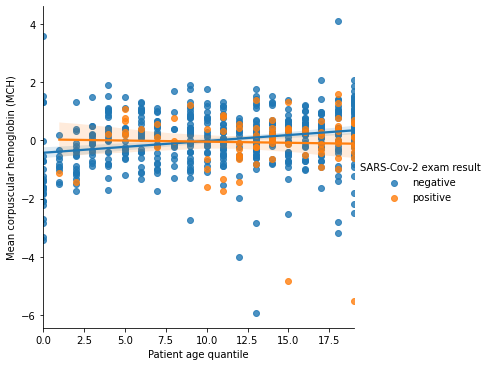

<Figure size 432x288 with 0 Axes>

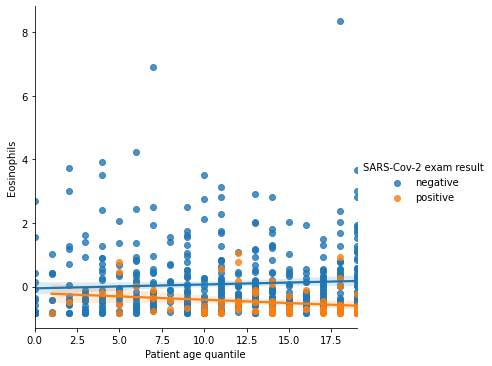

<Figure size 432x288 with 0 Axes>

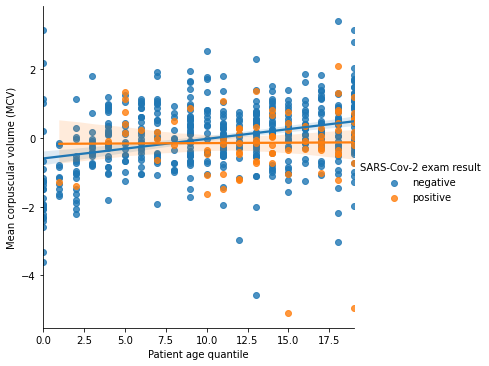

<Figure size 432x288 with 0 Axes>

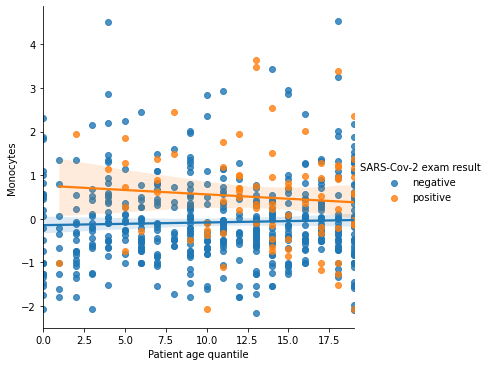

<Figure size 432x288 with 0 Axes>

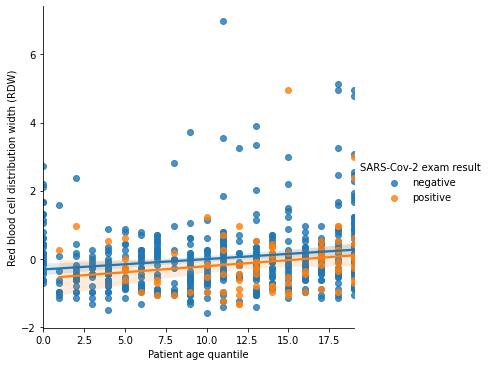

In [153]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x = 'Patient age quantile', y = col, hue = 'SARS-Cov-2 exam result', data = df)
    
#On constate que nos deux droites de régression ne sont pas superposées les unes aux autres et c'est première bonne nouvelle
#On remarque quelques outliers

#Il n'y a pas de relation linéaire entre l'âge et certaines variables sanguines

In [154]:
df.corr()['Patient age quantile'].sort_values()

#Il y a une faible corrélation entre l'âge et les variables de taux sanguins

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

## Relation entre Influenza et rapid test

In [155]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [156]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

## Relation Viral / sanguin

### création d'une nouvelle variable "est malade"

In [157]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis = 1) >= 1

In [158]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [159]:
#On va créer des sous-ensembles avec la variable "est malade"

malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

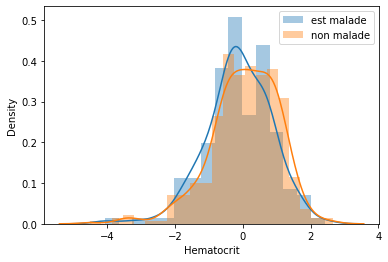

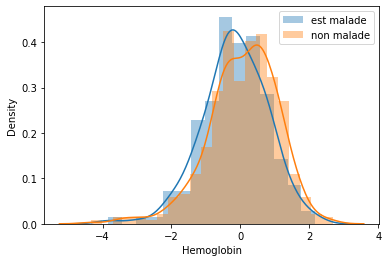

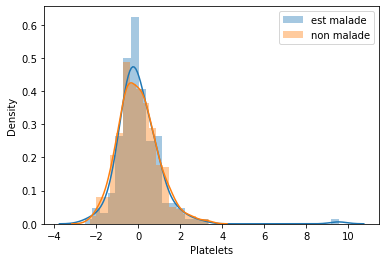

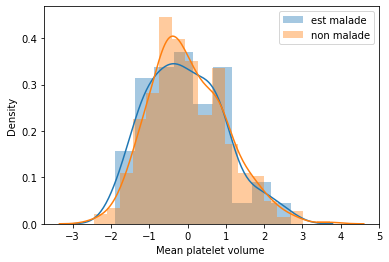

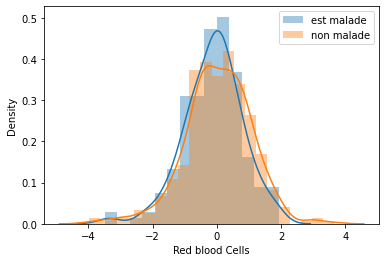

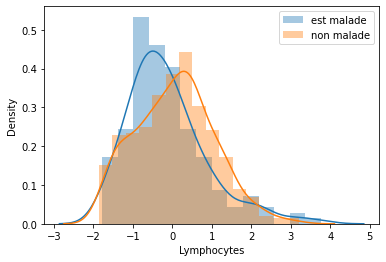

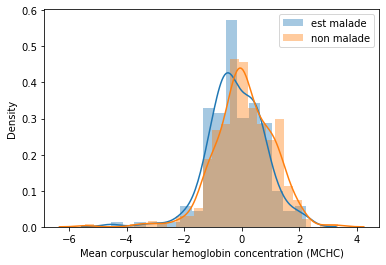

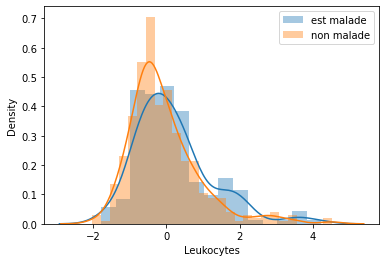

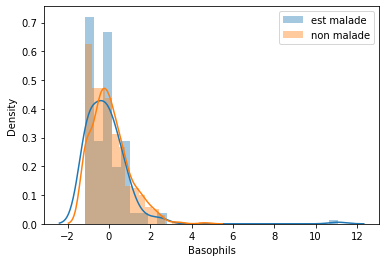

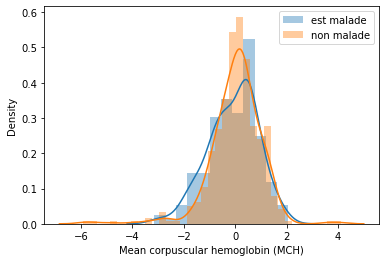

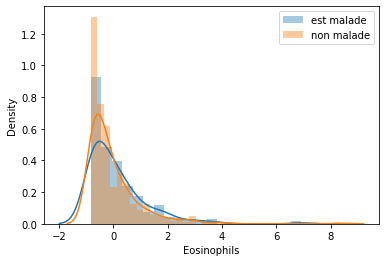

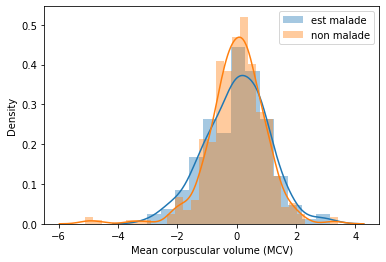

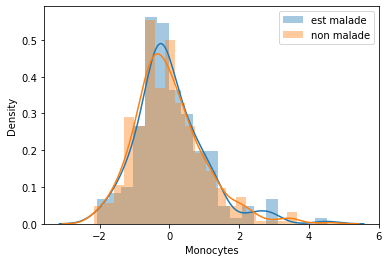

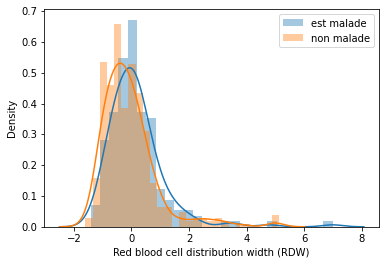

In [160]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label = 'est malade')
    sns.distplot(non_malade_df[col], label = 'non malade')
    plt.legend()

## Relation hospitalisation / blood

In [161]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soin semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soin intensifs'
    else:
        return 'inconnu'

In [162]:
df['statut'] = df.apply(hospitalisation, axis = 1) #la fonction "apply()" très importante

In [163]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

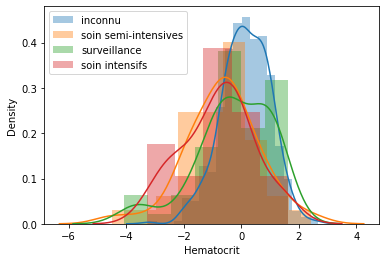

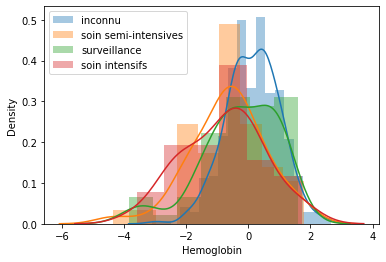

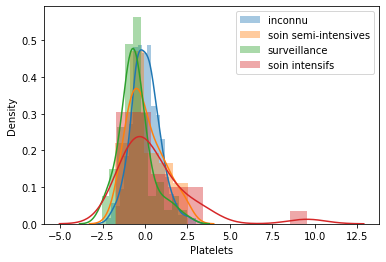

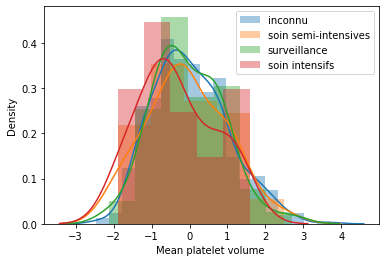

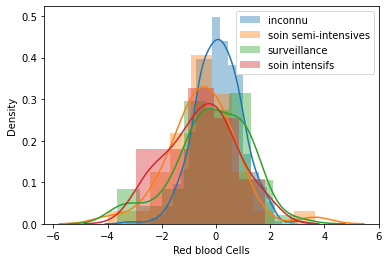

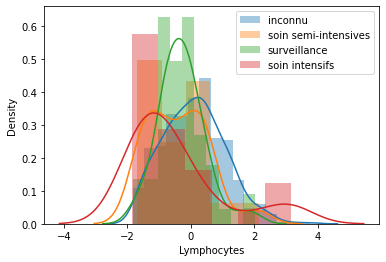

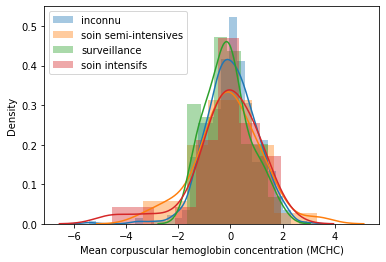

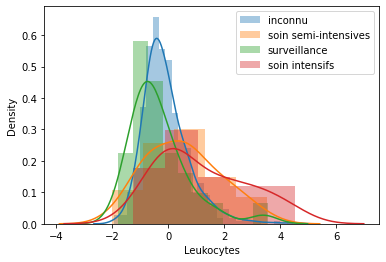

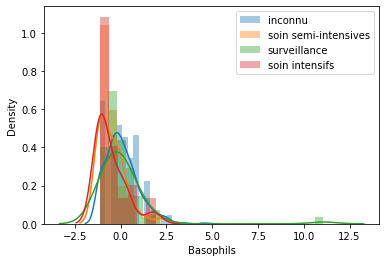

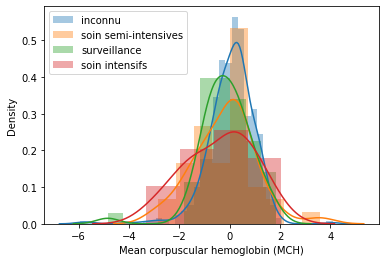

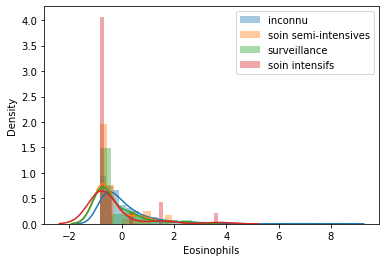

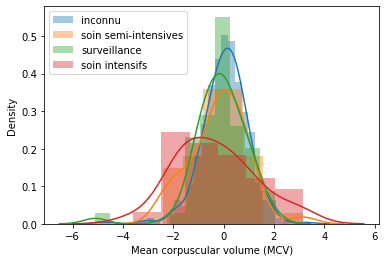

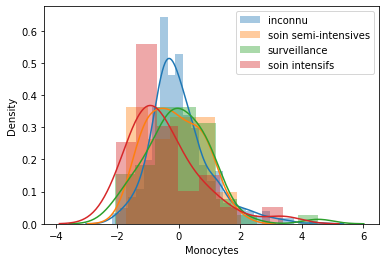

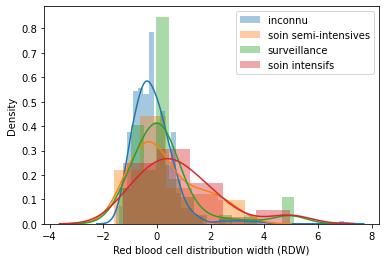

In [164]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut'] == cat][col], label = cat)
    plt.legend()

## Analyse détaillée des NaN

Actuellement nous avons deux types de variables, le **blood_columns** et le **viral_columns**. La reunion entre ces deux catégories de variables va éliminer énormément de variables dans notre dataset, on va se retrouver avec un nombre tout petit de données.

En utilisant df.dropna().count(), on ne se retrouve qu'avec 99 variables sur chaque colonne comparé aux 5600 que nous avions au départ. Donc si on veut travailler avec **blood_columns** et **viral_columns**, il faudra conserver nos valeurs manquantes et qu'on les remplisse avec un fil_na.

In [165]:
df[blood_columns].count()

#Si on ne travaille qu'avec blood_columns, on ne travaillera qu'avec 603 variables

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [166]:
df[viral_columns].count()

#Si on ne travaille qu'avec viral_columns, on ne travaillera qu'avec 1354 variables

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [167]:
#On va déterminer ci-dessous l'état de notre "target" si on élimine toutes les valeurs manquantes du groupe viral, est-ce qu'on
#garde toujours un bon rapport des positifs et des négatifs dans notre "target"....
#Le résultat ci-dessous nous montre qu'il nous reste à peu près les mêmes proportions.

df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize = True)

negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [168]:
df2 = df[blood_columns[:-2]]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize = True)

#Avec blood, on a des meilleures proportions. Il nous reste des meilleures proportions des positifs et des négatifs dans la
#target lorsqu'on enlève les valeurs manquantes!

negative    0.864775
positive    0.135225
Name: covid, dtype: float64

## T-Test

In [169]:
from scipy.stats import ttest_ind #on utilise l'outil ttest_ind ou t_test d'indépendance

Le problème avec le test de student est qu'il faut avoir des données balancés entre nos différents groupes càd le nombre des gens positifs doit à peu près être égal au nombre des gens négatifs. Et nous n'avons pas cela dans notre dataset, voir ci-dessous

In [170]:
positive_df.shape

(558, 38)

In [171]:
negative_df.shape

(5086, 38)

In [172]:
balanced_neg = negative_df.sample(positive_df.shape[0]) #On se retrouve avec 558 échantillons extrait au 
#hasard de notre dataframe negative_df

In [173]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else:
        return 0

In [174]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')
    
#On remarque que les "Platelets, Leukocytes, Eosinophils" semblent être des variables significativement différentes pour les
#gens atteints du covid-19.

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0


## 2. Pre-processing ou pré-traitement de données

C'est l'étape qui consiste à préparer nos données avant de les fournir à la machine pour son apprentissage. Le but du pre-processing est à la fois de mettre nos données dans un **format** proprice au développement d'un modèle Machine Learning, mais également d'avoir le dataset le plus propre possible afin d'**améliorer** la performance du modèle.
Pour cela, il existe plusieurs méthodes : on peut encoder nos données, les normaliser, nettoyer les valeurs manquantes NaN, nettoyer les valeurs abbérantes(outliers), sélectionner les meilleures variables, créer des nouvelles variables, extraire certaines caractéristiques, etc.

**Objectif**: 

1. Mettre les données dans un **format** propice au Machine Learning.
    - Train / Test
    - Encodage
    - Nettoyage des NaN
    
-> Après cette première étape, on va créer un premier modèle de Machine Learning pour l'évaluer et en faire un Diagnostique. À partir de là, on va pouvoir tenter d'améliorer la performance de notre modèle avec les différentes opérations de pre-processing. 

2. **Améliorer** la performance du modèle
    - Feature Selection : si le premier modèle ci-haut est en overfitting, on va essayer de faire une sélection des variables pour améliorer la performance de ce modèle
    - Feature Engineering :
    - Feature Scaling :
    - Suppression des Outliers :
    
-------------------------------------------------------------------------------------------------------------------------------

**Checklist de base (non-exhaustive)**:

- Création du Train set/ Test set
- Élimination des NaN : dropna(), imputation, colonnes "vides"
- Encodage (remplacer les variables catégorielles par des valeurs numériques)
- Suppression des outliers néfastes au modèles
- Feature Selection (éliminer les variables rédondantes, les variables qui n'ont pas de variance, dont la variance est nulle)
- Feature Engineering (on peut essayer de créer de nouvelles variables à partir de variables déjà existantes, on peut combiner des variables) 
- Feature Scaling (il penser à normaliser nos données)

In [202]:
df = data.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [203]:
df.shape

(5644, 111)

## Création des sous-ensembles (suite au EDA)

In [204]:
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [205]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [206]:
#On crée une liste des colonnes importantes dont l'âge et la target
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [207]:
df = df[key_columns + blood_columns + viral_columns] 
#Grâce à ces 3 sous-ensembles, on filtre notre dataframe df1 en disant que df1 est égale à la liste key_columns, blood_columns 
#et viral_columns. 
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

In [208]:
df.shape

(5644, 33)

## TrainTest - Nettoyage - Encodage

In [209]:
from sklearn.model_selection import train_test_split

In [211]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0) #on met 20% de 5644 dans le testset

In [212]:
trainset['SARS-Cov-2 exam result'].value_counts() 

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [213]:
testset['SARS-Cov-2 exam result'].value_counts() #Le testset, on le met de côté et on n'y touche jamais. On ne le manipule jamais

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

### Encodage

In [216]:
def encodage(df):
    code = {'negative':0,
           'positive':1,
           'not_detected':0,
           'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [223]:
#On voit qu'il n'y a plus de variables de types objects dans notre dataset

In [250]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis = 1)
    return df

### Élimination des variales manquantes

In [251]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [252]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [253]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [254]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


## Modelisation

In [295]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

**On va commencer par créer une liste de tout plein des modèles de Machine Learning différents et de soumettre tous ces modèles à la même procédure d'évaluation créée lors de l'étape du pre-processing. Comme on pourra identifier sur la base du dataset que l'on a créé, quel est le meilleur modèle de Machine Learning.**

In [303]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False), SelectKBest(f_classif, k=10))

In [304]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0)) #Pour le modèle SVM, il faut normaliser les données
#contrairement aux modèles des arbres de décision
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier()) #on normalise aussi le KNN

In [311]:
dict_of_models = {'RandomForest' : RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM' : SVM,
                  'KNN' : KNN
                 }

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

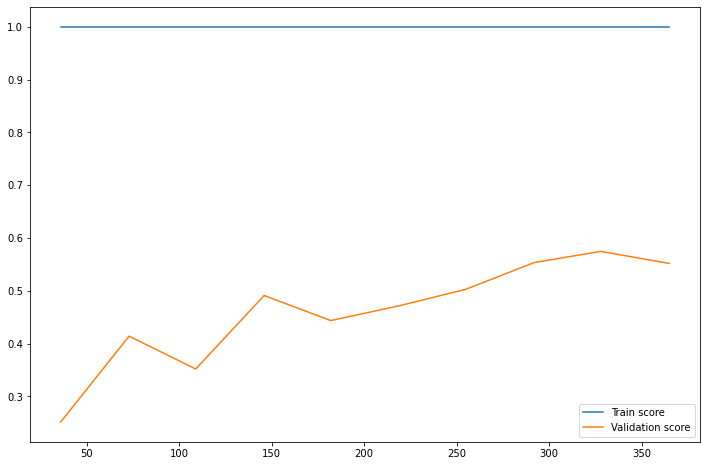

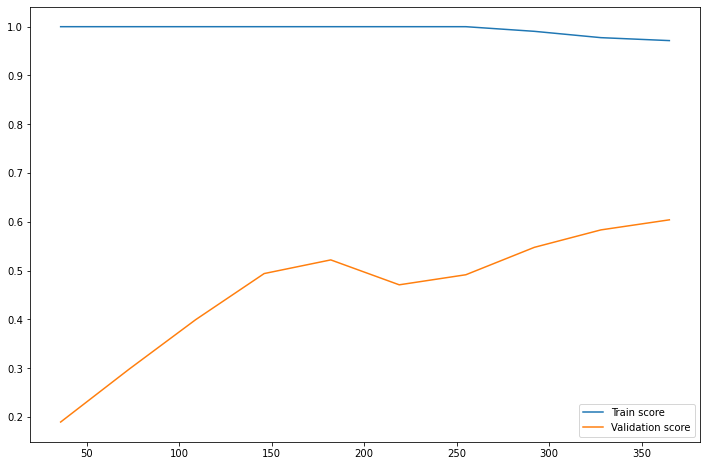

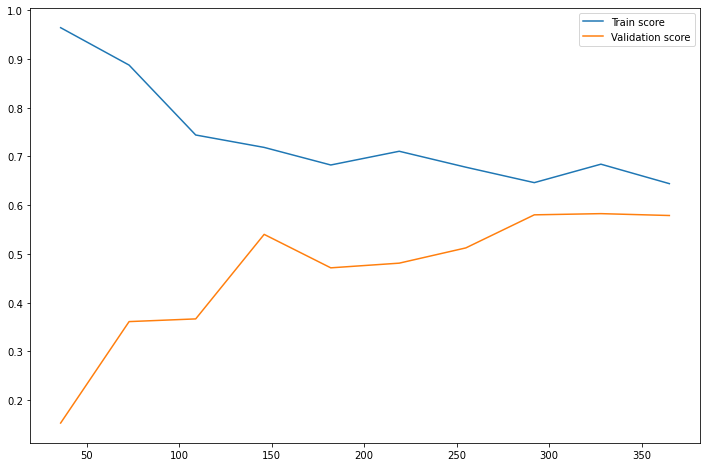

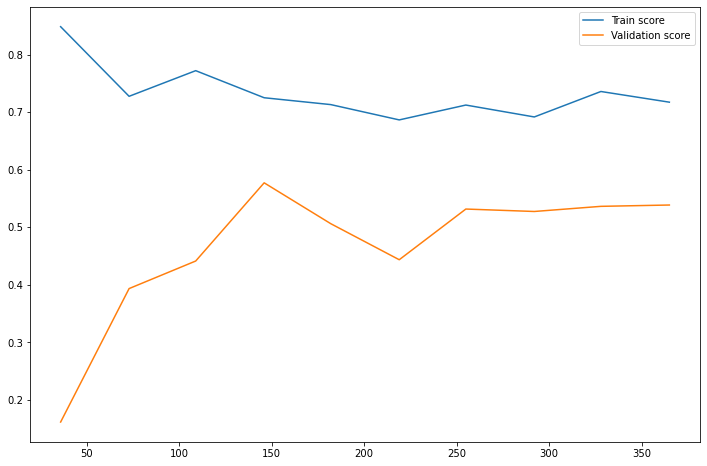

In [312]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)
    
#Le plus important est d'avoir un écart réduit entre le train score et la validation score, car ça nous montre que le modèle
#a bien aapris mais qu'il est capable de généraliser, il n'a pas overfit son trainset.

f_classif pour importer le test de Anova


K=10 ou 5 pour spécifier qu'on va prendre les 10 meilleures variables càd celles qui ont les liens les plus forts en test de Anova
entre notre target et nos variables X_train

On introduit dans notre pipeline le PolynomialFeatures(2), 2 pour polynome de degré 2, ici on élève chaque variable au carrée
et on multiplie également chaque variable avec ses différentes voisines!!!

### Procédure d'évaluation

La métrique **f1** permet d'avoir un bon aperçu entre le rapport de la précision et de la sensibilité. La précision et la sensibilité ou recall, ce sont des métriques qui nous permettent de mesurer les proportions d'erreur type 1 et d'erreur de type 2 dans notre dataset càd les proportions de faux positifs et des faux négatifs que notre modèle effectue!!!!

In [282]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [283]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label = 'Train score')
    plt.plot(N, val_score.mean(axis=1), label = 'Validation score')
    plt.legend()

[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



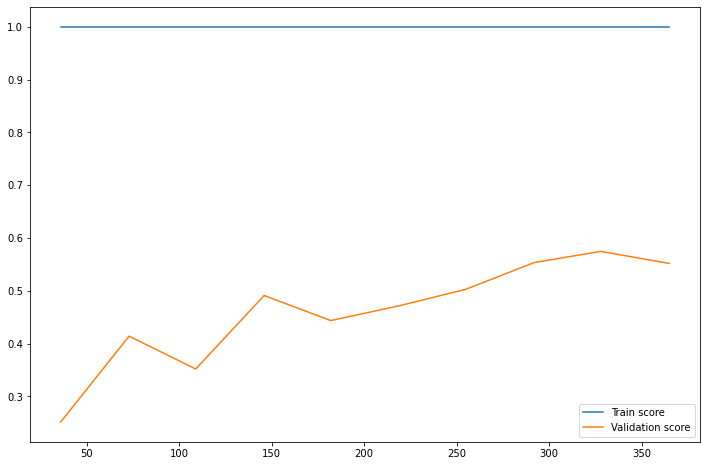

In [284]:
evaluation(model)
#Le résultat ci-dessous nout dit que sur 54 cas négatifs dans notre testset, on a pu identifié correctement 52 cas(personnes) 
#càd que ces personnes sont négatives au covid. Et on a fait 2 erreurs, càd que 2 personnes qui étaient censées être
#négatives au covid, sont en réalité positifves au covid.

#Avec notre modèle, on a correctement identifié 2 cas positifs et on a incorrectement rejeté 10 personnes. Donc parmi les 12
#personnes qui étaient porteurs du covid d'après le dataset, on a pu identier seulement 2 individus. On a pu identifier 
#seulement 17% de cas positifs au corona virus.

On voit tout de suite ci-haut que notre modèle est en overfitting parce que le modèle a un score de 100% sur les données de **trainset**. Le score du f1 est assez bas, il tourne autour de 50%. Il y a un grand écart entre le train score et la validation score, ce qui prouve que le modèle est en overfitting. On peut par exemple fournir plus des données à la machine pour résoudre ce problème d'overfitting. On voit sur la courbe de la validation score que si plus on ajoute des données, plus le score augmente.


Donc à la place de dropna(), on va utiliser fillna(). L'utilisation de fillna() n'a pas amélioré la performance de notre modèle et le score obtenu était très bas; pour se faire, nous sommes revenus sur **dropna()**.

**Pour résoudre notre problème, nous allons à présent partir sur la méthode de sélection des variables. Nous allons choisir nos variables en fonction de leur importance dans la découpe de l'arbre de décision**

In [286]:
#pd.DataFrame(model.feature_importances_, index = X_train.columns).plot.bar(figsize = (12, 8))

#On a injecté les résultats dans un DataFrame pandas dans lequel pour chaque valeur, on aura la colonne associée. En index, les
#colonnes de notre X_train.

#Sur ce graphique, nous voyons que pour notre modèle, ce sont les variables de type sang qui sont les plus importantes, ce ne
#sont vraiment les variables de virus. Ce résultat n'est pas surprenant puisque nous avons constaté cela lors de l'EDA

#On a premièment éliminé les variables virales mais cela n'a rien changé!!! Nous avons remis nos variables virales

## Modelling ou la modélisation

Pour commencer, on va entraîner tout plein de modèles différents et on va retenir celui qui a la meilleure performance. Ensuite on va tenter d'améliorer la performance de ce modèle en optimisant ses hyperparamètres grâce à une serie de plusieurs algorithmes GridSearchCV. On va essayer de déterminer le meilleur seuil

**Objectif:** Développer un modèle de machine learning qui réponde à l'objectif final.

**Checklist de base (non-exhaustive)**:

- Définir une fonction d'évaluation
- Entrainement de différents modèles (pour voir celui qui a la meilleure performance)
- Optimisation avec GridSearchCV
- (Optionnel) Analyse des errreurs et retour au Pre-processing/EDA
- Learning Curve et prise de décision

## OPTIMISATION

In [319]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [314]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [321]:
hyper_params = {'svc__gamma' : [1e-3, 1e-4],
               'svc__C' : [1, 10, 100, 1000],
               'pipeline__polynomialfeatures__degree' : [2, 3, 4],
               'pipeline__selectkbest__k' : range(40, 60)}

In [322]:
#grid = GridSearchCV(SVM, hyper_params, scoring = 'recall', cv=4)
grid = RandomizedSearchCV(SVM, hyper_params, scoring = 'recall', cv=4, n_iter = 40)

#On choisit le score "recall" car c'était ça l'objectif que nous nous étions fixés dans cette étude. On veut minimiser le 
#"recall" càd le nombre des personnes qui sont positives au covid-19 mais qu'on ne détecte pas étant positif; du coup ses 
#personnes sontaminées se retrouvent dans la nature!!!

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred)) #Il faut toujours passer y_test en premier sinon les résultats sont inversés dans
#les matrices de confusion

#on a reussi à améliorer un petit peu la performance de notre modèle SVM en touchant à ses hyperparamètres

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 54, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       0.56      0.56      0.56        16

    accuracy                           0.87       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.87      0.87      0.87       111



[[92  3]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.70      0.44      0.54        16

    accuracy                           0.89       111
   macro avg       0.81      0.70      0.74       111
weighted avg       0.88      0.89      0.88       111



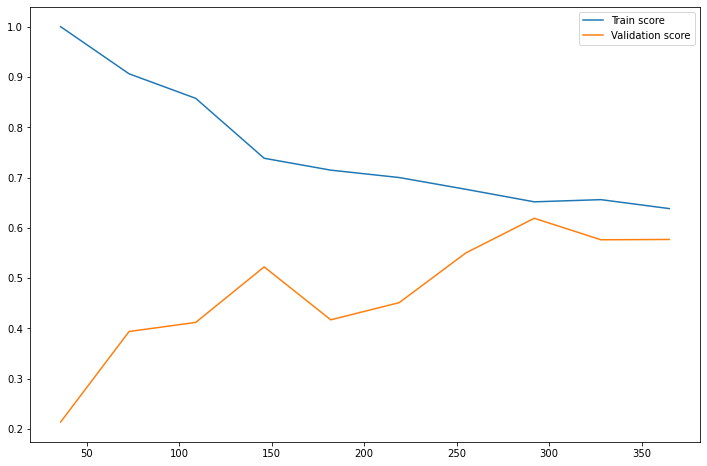

In [318]:
evaluation(grid.best_estimator_)

**On voit sur ce graphique que la courbe du train score diminue mais la courbe du validation score augmente, on remarque que l'on commence à atteindre un certain palier où les deux se rejoignent et cela est bien car d'une part cela signifie que le modèle n'est pas en overfitting parce que son score sur le trainset et le même que le validation. Donc le modèle est capable de généraliser!!!***

## Precision Recall Curve

In [326]:
from sklearn.metrics import precision_recall_curve

In [329]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

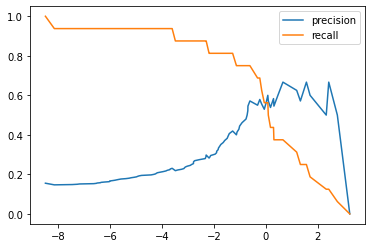

In [330]:
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.legend()

Sur ce graphique, on voit que si on prend un seuil de décision égale à -8 par exemple, alors notre recall sera proche de 100% càd que toutes les personnes testées positives au covid-19, on aura su les identifier. Sauf qu'on enverra en même temps les personnes négatives au covid-19.
Plus la précision augmente, plus le recall diminue!!!

L'idée, c'est de tenter de trouver le seuil de décision à l'intérieur de notre SVM qui va nous donner le meilleur **recall** avec la meilleure **precision**, et en général c'est le scrore_f1 qui nous permet de trouver ça. C'est souvent l'endroit où se trouve le croisement entre precision et recall!!!!

In [331]:
def model_final(model, X, threshold = 0):
    return model.decision_function(X) > threshold

In [332]:
y_pred = model_final(grid.best_estimator_, X_test, threshold = -1)

In [334]:
from sklearn.metrics import recall_score

In [333]:
f1_score(y_test, y_pred)

0.5714285714285714

In [335]:
recall_score(y_test, y_pred)

0.75

**À retenir :**

- Lorsqu'on passe dans la partie modélisation, il faut commencer par tester différents modèles dans un dictionnaire ou dans une liste. L'algorithme de SVM est en général extremement efficace sur les petits datasets et très complexes.
- Il faut retenir les modèles qui nous donnent les meilleurs résultats
- Puis il faut essayer d'optimiser ces modèles avec GridSearchCV puis un RandomizeSearchCV et ça va nous donner les meilleurs hyperparamètres.
- Et pour finir, dans la cas d'une classification binaire càd le patient est malade ou pas, il faut afficher les courbes de précision et de recall pour définir soi-même le seuil de décision pour lequel on va dire qu'une personne est malade ou non. Et cela nous permet d'atteindre des meilleurs performances que si l'on dépend des résultats donnés par les modèles !!!!